In [1]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

In [2]:
bg1_image = cv2.imread('/content/data/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image , (678, 381))
ob_image = cv2.imread('/content/data/Object.png', 1)
ob_image = cv2.resize(ob_image , (678, 381))
bg2_image = cv2.imread('/content/data/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image , (678, 381))

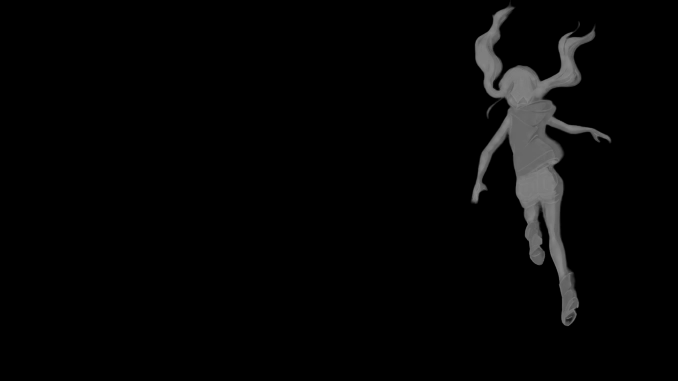

In [4]:
def compute_difference(bg_img, input_img):
  difference_single_channel = cv2.absdiff(bg_img, input_img)
  difference_single_channel = cv2.cvtColor(difference_single_channel, cv2.COLOR_BGR2GRAY)
  return difference_single_channel
difference_single_channel = compute_difference(bg1_image , ob_image)
cv2_imshow(difference_single_channel)

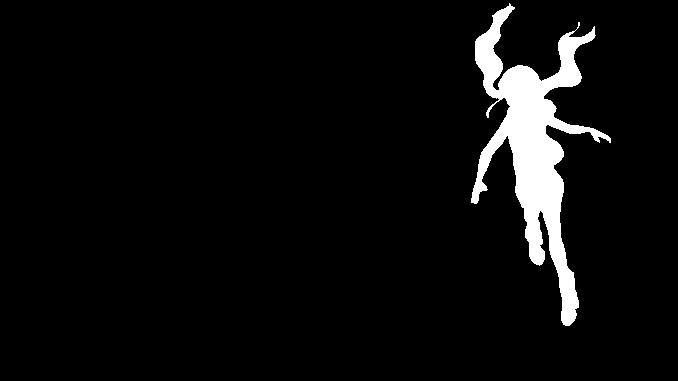

In [5]:
def compute_binary_mask(difference_single_channel):
  # *********** Your code here ***********
  difference_binary = np.where(difference_single_channel < 20, 0, 255)
  return difference_binary
binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)

In [8]:
def replace_background(bg1_image , bg2_image , ob_image):
  difference_single_channel = compute_difference(bg1_image ,ob_image)
  binary_mask = compute_binary_mask(difference_single_channel)
  binary_mask = binary_mask[..., None]
  output = np.where(binary_mask==255, ob_image, bg2_image)
  return output

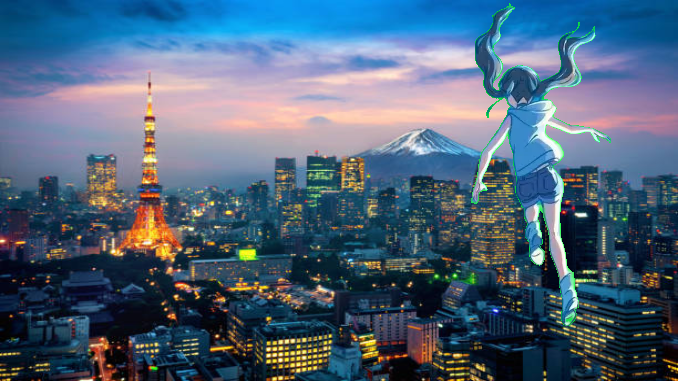

In [9]:
cv2_imshow(replace_background(bg1_image , bg2_image , ob_image))